In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/valladolidacsv/laligalogo.png
/kaggle/input/valladolidacsv/README.md
/kaggle/input/valladolidacsv/code/Progressive Passes.ipynb
/kaggle/input/valladolidacsv/code/bumpy_charts.ipynb
/kaggle/input/valladolidacsv/code/Pizza.ipynb
/kaggle/input/valladolidacsv/code/shotmaps.ipynb
/kaggle/input/valladolidacsv/code/Convex Hulls Grid.ipynb
/kaggle/input/valladolidacsv/code/Convex Hulls tutorial.ipynb
/kaggle/input/valladolidacsv/code/Understat Scraper.ipynb
/kaggle/input/valladolidacsv/code/Beeswarms.ipynb
/kaggle/input/valladolidacsv/code/Pass Networks.ipynb
/kaggle/input/valladolidacsv/code/Pass Networks Tutorial.ipynb
/kaggle/input/valladolidacsv/code/voronoi.ipynb
/kaggle/input/valladolidacsv/code/KMeans tutorial.ipynb
/kaggle/input/valladolidacsv/code/Waffle Plots FBREF.ipynb
/kaggle/input/valladolidacsv/code/xG flow tutorial.ipynb
/kaggle/input/valladolidacsv/code/Radars Tutorial.ipynb
/kaggle/input/valladolidacsv/code/movingaverages.ipynb
/kaggle/input/valladolidacsv/data/

In [2]:
!pip install mplsoccer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.4/101.4 kB 3.0 MB/s eta 0:00:00


In [3]:
from mplsoccer import Pitch, VerticalPitch

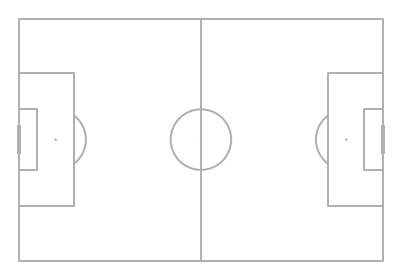

In [4]:
pitch = Pitch()
fig, ax = pitch.draw()

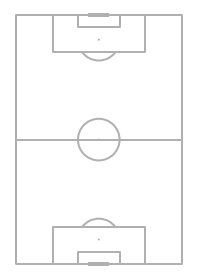

In [5]:
pitch = VerticalPitch()
fig, ax = pitch.draw()

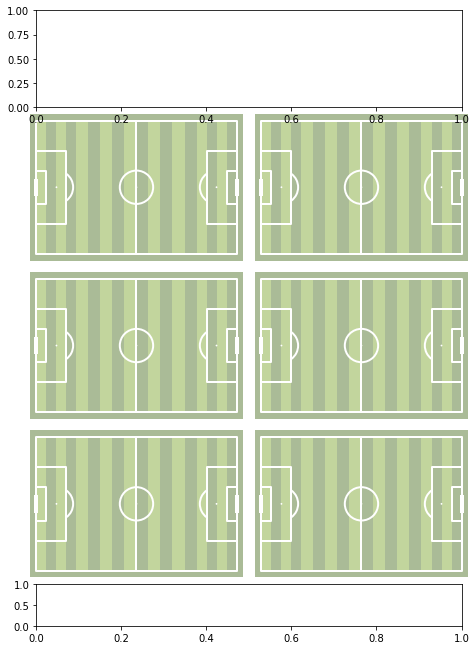

In [6]:
pitch = Pitch(pitch_color='#aabb97', line_color='white',
              stripe_color='#c2d59d', stripe=True)
fig, axs = pitch.grid(nrows=3, ncols=2)

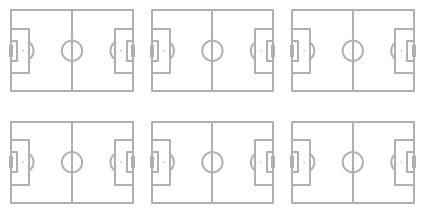

In [7]:
pitch = Pitch()
fig, axs = pitch.draw(nrows=2, ncols=3)

In [8]:
df_og = pd.read_csv('/kaggle/input/valladolidacsv/data/valladolidA.csv')

In [9]:
df = df_og.copy()

In [10]:
df.head()

,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY
0,2248226915,2,0,0.0,Barcelona,0.0,0.0,1,Start,Successful,NaN,NaN,NaN
1,2248226919,2,0,0.0,Valladolid,0.0,0.0,1,Start,Successful,NaN,NaN,NaN
2,2248226929,3,0,1.0,Barcelona,50.0,50.0,1,Pass,Successful,9.0,43.9,46.9
3,2248226941,4,0,2.0,Barcelona,43.8,46.9,1,Pass,Successful,8.0,36.4,56.0
4,2248226951,5,0,4.0,Barcelona,36.6,56.6,1,Pass,Successful,21.0,28.5,73.8


In [11]:
df = df[df['teamId']=='Barcelona']
df.head()

,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY
0,2248226915,2,0,0.0,Barcelona,0.0,0.0,1,Start,Successful,NaN,NaN,NaN
2,2248226929,3,0,1.0,Barcelona,50.0,50.0,1,Pass,Successful,9.0,43.9,46.9
3,2248226941,4,0,2.0,Barcelona,43.8,46.9,1,Pass,Successful,8.0,36.4,56.0
4,2248226951,5,0,4.0,Barcelona,36.6,56.6,1,Pass,Successful,21.0,28.5,73.8
5,2248226973,6,0,5.0,Barcelona,28.3,74.1,1,Pass,Successful,15.0,11.6,51.8


In [12]:
df['passer'] = df['playerId']
df['recipient'] = df['playerId'].shift(-1)

passes = df[df['type']=='Pass']
successful = passes[passes['outcome']=='Successful']

successful.head()

,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,passer,recipient
2,2248226929,3,0,1.0,Barcelona,50.0,50.0,1,Pass,Successful,9.0,43.9,46.9,9.0,8.0
3,2248226941,4,0,2.0,Barcelona,43.8,46.9,1,Pass,Successful,8.0,36.4,56.0,8.0,21.0
4,2248226951,5,0,4.0,Barcelona,36.6,56.6,1,Pass,Successful,21.0,28.5,73.8,21.0,15.0
5,2248226973,6,0,5.0,Barcelona,28.3,74.1,1,Pass,Successful,15.0,11.6,51.8,15.0,1.0
6,2248226975,7,0,8.0,Barcelona,11.2,53.7,1,Pass,Successful,1.0,11.6,81.4,1.0,15.0


Passes before first sub

In [13]:
#identifying first sub
subs = df[df['type']=='SubstitutionOff']
subs = subs['minute']
firstsub = subs.min()

successful = successful[successful['minute']<firstsub]

firstsub

70

In [14]:
successful[['passer', 'recipient']] = successful[['passer', 'recipient']].astype('Int64')
successful.head()

,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,passer,recipient
2,2248226929,3,0,1.0,Barcelona,50.0,50.0,1,Pass,Successful,9.0,43.9,46.9,9,8
3,2248226941,4,0,2.0,Barcelona,43.8,46.9,1,Pass,Successful,8.0,36.4,56.0,8,21
4,2248226951,5,0,4.0,Barcelona,36.6,56.6,1,Pass,Successful,21.0,28.5,73.8,21,15
5,2248226973,6,0,5.0,Barcelona,28.3,74.1,1,Pass,Successful,15.0,11.6,51.8,15,1
6,2248226975,7,0,8.0,Barcelona,11.2,53.7,1,Pass,Successful,1.0,11.6,81.4,1,15


In [15]:
avg_locs = successful.groupby('passer').agg({'x':('mean'), 'y':('mean', 'count')})

avg_locs.columns = ['x', 'y', 'count']

avg_locs

,x,y,count
passer,,,
1,7.124000,50.324000,25
2,68.274359,11.915385,39
4,32.895833,43.518750,48
8,53.332927,41.608537,82
9,69.916667,51.383333,6
10,63.201613,42.351613,62
15,38.409091,74.378182,55
16,69.594286,69.471429,35
18,55.242553,83.793617,47


In [16]:
pass_between = successful.groupby(['passer', 'recipient']).id.count().reset_index()
pass_between.rename({'id':'pass_count'}, axis='columns', inplace=True)
pass_between

,passer,recipient,pass_count
0,1,2,3
1,1,4,3
2,1,8,4
3,1,9,1
4,1,15,4
...,...,...,...
85,28,8,13
86,28,9,3
87,28,10,5
88,28,18,1


In [17]:
pass_between = pass_between.merge(avg_locs, left_on='passer', right_index=True)
pass_between = pass_between.merge(avg_locs, left_on='recipient', right_index=True, suffixes=['', '_end'])

pass_between

,passer,recipient,pass_count,x,y,count,x_end,y_end,count_end
0,1,2,3,7.124000,50.324000,25,68.274359,11.915385,39
18,4,2,1,32.895833,43.518750,48,68.274359,11.915385,39
26,8,2,8,53.332927,41.608537,82,68.274359,11.915385,39
35,9,2,2,69.916667,51.383333,6,68.274359,11.915385,39
39,10,2,6,63.201613,42.351613,62,68.274359,11.915385,39
...,...,...,...,...,...,...,...,...,...
52,15,10,1,38.409091,74.378182,55,63.201613,42.351613,62
60,16,10,10,69.594286,69.471429,35,63.201613,42.351613,62
70,18,10,7,55.242553,83.793617,47,63.201613,42.351613,62
77,21,10,14,55.663636,52.263636,55,63.201613,42.351613,62


In [18]:
pass_btw = pass_between[pass_between['pass_count']>3]

pass_btw

,passer,recipient,pass_count,x,y,count,x_end,y_end,count_end
26,8,2,8,53.332927,41.608537,82,68.274359,11.915385,39
39,10,2,6,63.201613,42.351613,62,68.274359,11.915385,39
74,21,2,4,55.663636,52.263636,55,68.274359,11.915385,39
83,28,2,10,49.156863,16.282353,51,68.274359,11.915385,39
27,8,4,8,53.332927,41.608537,82,32.895833,43.518750,48
50,15,4,9,38.409091,74.378182,55,32.895833,43.518750,48
84,28,4,13,49.156863,16.282353,51,32.895833,43.518750,48
2,1,8,4,7.124000,50.324000,25,53.332927,41.608537,82
11,2,8,11,68.274359,11.915385,39,53.332927,41.608537,82
19,4,8,6,32.895833,43.518750,48,53.332927,41.608537,82


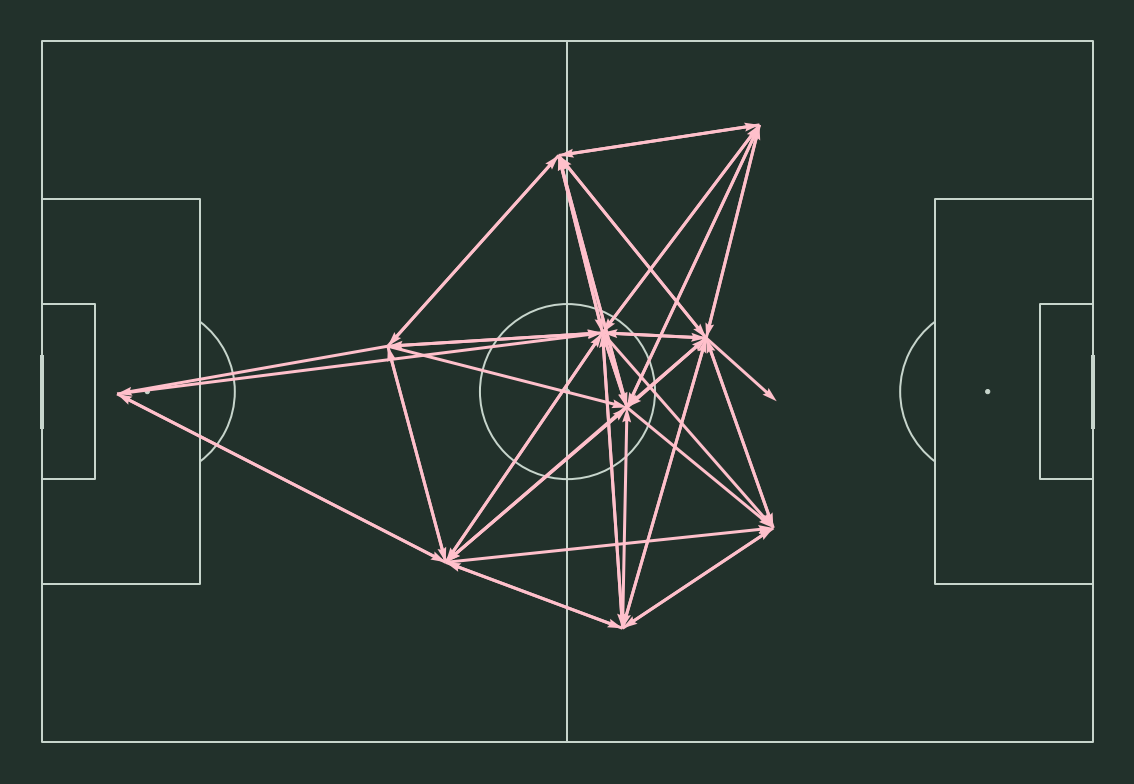

In [19]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=False, tight_layout=True)
fig.set_facecolor('#22312b')

arrows = pitch.arrows(1.2*pass_btw.x, 0.8*pass_btw.y, 1.2*pass_btw.x_end, 0.8*pass_btw.y_end, ax=ax, width=3, headwidth=3, color='pink')

In [20]:
from matplotlib.colors import to_rgba
from mplsoccer import Pitch, FontManager, Sbopen

In [21]:
df_og.head()

,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY
0,2248226915,2,0,0.0,Barcelona,0.0,0.0,1,Start,Successful,NaN,NaN,NaN
1,2248226919,2,0,0.0,Valladolid,0.0,0.0,1,Start,Successful,NaN,NaN,NaN
2,2248226929,3,0,1.0,Barcelona,50.0,50.0,1,Pass,Successful,9.0,43.9,46.9
3,2248226941,4,0,2.0,Barcelona,43.8,46.9,1,Pass,Successful,8.0,36.4,56.0
4,2248226951,5,0,4.0,Barcelona,36.6,56.6,1,Pass,Successful,21.0,28.5,73.8


In [22]:
parser = Sbopen()
events, related, freeze, players = parser.event(15946)
TEAM = 'Barcelona'
OPPONENT = 'versus Val (A), 2018/19 La Liga'

In [23]:
events

,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,...,foul_won_defensive,bad_behaviour_card_id,bad_behaviour_card_name,substitution_replacement_id,substitution_replacement_name,pass_cut_back,shot_one_on_one,foul_committed_advantage,foul_won_advantage,pass_goal_assist
0,ce508a95-38d3-4248-a50e-dc8d7e23230c,1,1,00:00:00,0,0,1,0.000000,15946,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,39abd1c2-2575-41be-ae79-3e936eead529,2,1,00:00:00,0,0,1,0.000000,15946,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1148e967-380f-421f-97f0-d0c820c72984,3,1,00:00:00,0,0,1,0.000000,15946,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7cf6876d-7c50-4d64-b999-e2a039641c81,4,1,00:00:00,0,0,1,0.000000,15946,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,34208ade-2af4-45c3-970e-655937cad938,5,1,00:00:00.098000,0,0,2,1.909000,15946,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3997,be8a2725-6a34-45d5-8a49-5c9e0208e805,3998,2,00:46:41.244000,91,41,144,0.525000,15946,17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3998,55d71847-9511-4417-aea9-6f415e279011,3999,2,00:46:42.770000,91,42,144,0.497348,15946,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3999,f93a1612-e2de-4efe-b202-6c4a178eebad,4000,2,00:46:43.268000,91,43,144,0.000000,15946,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4000,e1cc4d5e-ba55-4b6b-88cc-dae13311c1d9,4001,2,00:47:32.053000,92,32,144,0.000000,15946,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
